In [1]:
import sys, os
#sys.path.append('/user/PyPPM')
from ppmpy import ppm
from matplotlib import pyplot as plt
import logging
import math
logging.getLogger("matplotlib").setLevel(logging.ERROR)

In [2]:
def list_columns(obj, cols=6, columnwise=True, gap=4):
    """
    Print the given list in evenly-spaced columns.

    Parameters
    ----------
    obj : list
        The list to be printed.
    cols : int
        The number of columns in which the list should be printed.
    columnwise : bool, default=True
        If True, the items in the list will be printed column-wise.
        If False the items in the list will be printed row-wise.
    gap : int
        The number of spaces that should separate the longest column
        item/s from the next column. This is the effective spacing
        between columns based on the maximum len() of the list items.
    """

    sobj = [str(item) for item in obj]
    if cols > len(sobj): cols = len(sobj)
    max_len = max([len(item) for item in sobj])
    if columnwise: cols = int(math.ceil(float(len(sobj)) / float(cols)))
    plist = [sobj[i: i+cols] for i in range(0, len(sobj), cols)]
    if columnwise:
        if not len(plist[-1]) == cols:
            plist[-1].extend(['']*(len(sobj) - len(plist[-1])))
        plist = zip(*plist)
    printer = '\n'.join([
        ''.join([c.ljust(max_len + gap) for c in p])
        for p in plist])
    print(printer)

# Initialisation

In [3]:
dir_repo    = '/data/ASDR'
dir_project = 'H-core-M25'
run         = 'M29-768'
path = os.path.join(dir_repo,dir_project,run,'rprofs')
rp_set = ppm.RprofSet(path)

2413 rprof files found in '/data/ASDR/H-core-M25/M29-768/rprofs/.
Dump numbers range from 0 to 2412.


# Run history

In [4]:
rp_hst = rp_set.get_history()

In [5]:
rp_hst.get_variables()

['NDump',
 'NCycle',
 'time(secs)',
 'time(mins)',
 'dt(secs)',
 'Courant',
 'MachNoMax',
 'TotalFlops',
 'TimeStamp']

In [6]:
list_columns(rp_hst.get('NDump'), cols=15)

0       156     321     486     651     789     954     1119    1284    1449    1598    1763    1928    2093    2258    
1       157     322     487     652     790     955     1120    1285    1450    1599    1764    1929    2094    2259    
2       158     323     488     653     791     956     1121    1286    1451    1600    1765    1930    2095    2260    
3       159     324     489     654     792     957     1122    1287    1452    1601    1766    1931    2096    2261    
4       160     325     490     655     793     958     1123    1288    1453    1602    1767    1932    2097    2262    
5       161     326     491     656     794     959     1124    1289    1454    1603    1768    1933    2098    2263    
6       162     327     492     657     795     960     1125    1290    1455    1604    1769    1934    2099    2264    
7       163     328     493     658     796     961     1126    1291    1456    1605    1770    1935    2100    2265    
8       164     329     494     

(0.0, 300.0)

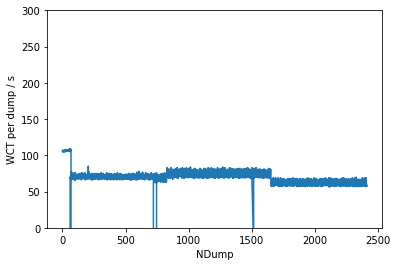

In [7]:
ifig=1; plt.close(ifig); plt.figure(ifig)
rp_hst.plot_wct_per_dump()
plt.ylim((0., 300.))

# Reading and plotting data

In [8]:
t=rp_set.get('t',fname=675)
list_columns(rp_set.get('A', t, num_type='t', resolution='l'), cols=8)

Dump 675 at t = 114211.50 min is the closest to t = 114211.54 min.
36.566212    32.631344    29.739134    27.533916    24.4167      24.41354     24.415873    24.421856    
36.566223    32.555637    29.691031    27.312973    24.416521    24.413557    24.415915    24.421944    
36.567909    32.480808    29.643143    26.966076    24.416344    24.413572    24.415939    24.422026    
36.763779    32.406639    29.595512    26.444529    24.416155    24.413578    24.415983    24.422043    
36.865971    32.333004    29.548376    25.809841    24.415974    24.413601    24.416046    24.422123    
36.849133    32.26049     29.501572    25.25947     24.415794    24.413628    24.416143    24.422209    
36.827904    32.189178    29.455105    24.892612    24.415625    24.413671    24.416256    24.422329    
36.785545    32.11853     29.40888     24.681787    24.415461    24.413702    24.416317    24.422428    
36.708885    32.048538    29.3629      24.569092    24.415314    24.413763    24.416416    24

In [9]:
rp = rp_set.get_dump(675)

In [10]:
list_columns(rp.get_header_variables(), cols=3)

airmu                         ifintel                       nvarstovisualize              
argsimg(1)                    ifmoms                        nViews                        
argsimg(10                    ifnotviolent                  NWorkersPerTeam               
argsimg(11                    ifnowriteback                 Nx                            
argsimg(12                    ifpmoms                       NXBricks                      
argsimg(13                    ifsimplechop                  NXBricksPerTeam               
argsimg(14                    ifsloflo                      NXTeams                       
argsimg(15                    ifsrend                       NYBricks                      
argsimg(16                    ifteambobs                    NYTeams                       
argsimg(17                    isstar                        NZBricks                      
argsimg(18                    lenbob8                       NZTeams                       

In [11]:
print('Nx = ' + str(rp.get('Nx')))
print('airmu = ' + str(rp.get('airmu')))
print('cldmu = ' + str(rp.get('cldmu')))

Nx = 768
airmu = 0.6690000295639038
cldmu = 0.6169999837875366


In [12]:
rp.get_hr_variables()

['FV', 'FV0', 'P0', 'P1', 'R', 'Rho0', 'Rho1', 'T9']

In [13]:
list_columns(rp.get_lr_variables(),cols=3)

A               EnucSumMax      Rho1fMin        
Ceul            EnucSumMin      RhoUr           
dEnucRMS        FV              RhoUrH          
dEnucSumRMS     FVMax           RhoUrUsq        
dFVrms          FVMin           RhoUrUsqMax     
dHburnedRMS     Hburned         RhoUrUsqMin     
dMachRMS        HburnedMax      T9              
dP1fRMS         HburnedMin      T9Max           
dRho1fRMS       Mach            T9Min           
dRhoUrUsqRMS    Mach#           Ur              
dT9RMS          MachMax         UrMax           
dUrRMS          MachMin         UrMin           
d|Ut|RMS        P1/P0           |Ut|            
d|U|RMS         P1fMax          |Ut|Max         
Enuc            P1fMin          |Ut|Min         
EnucMax         R               |U|             
EnucMin         Rho1/Rho0       |U|Max          
EnucSum         Rho1fMax        |U|Min          


In [14]:
# for nice colors, linestyles, etc.
import nugridpy.utils as utils
cb = utils.linestylecb

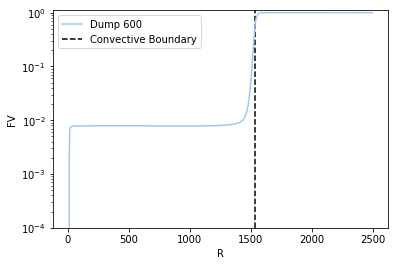

In [15]:
ifig=2; plt.close(ifig); plt.figure(ifig)

# get quantities, use high resolution!
fv = rp_set.get('FV',600,resolution='h')
r = rp_set.get('R',600,resolution='h')

# plot FV vs. R, semilog it
plt.semilogy(r, fv, color=cb(0)[2], linestyle=cb(0)[0], label='Dump 600')

# where is the convective boundary?
conv_bound = rp_set.bound_rad(600,1000,2000,var='FV',criterion='max_grad')

ymin = 1e-4
ymax = 1.1
plt.vlines(conv_bound[0],ymin,ymax,color='k',linestyle='--',label='Convective Boundary')

# force a range for FV values
plt.ylim([ymin,ymax])

# other details in a plot
plt.xlabel('R')
plt.ylabel('FV')
plt.legend()